Model Performance:
      Classifier  Accuracy  Precision    Recall  F1 Score
0  Decision Tree       1.0   1.000000  1.000000  1.000000
1            KNN       1.0   1.000000  1.000000  1.000000
2     Perceptron       0.8   0.863636  0.769231  0.737815


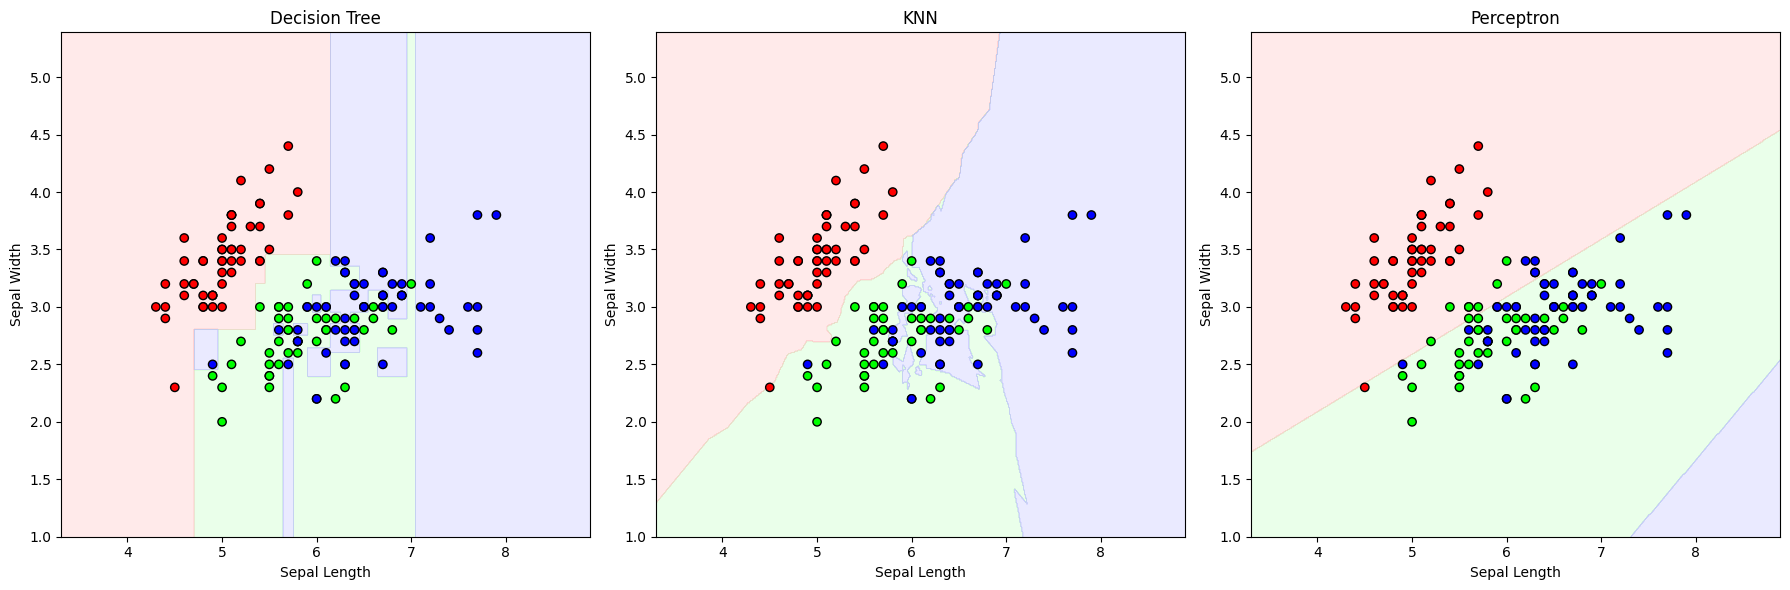

The depth of the Decision Tree is: 12


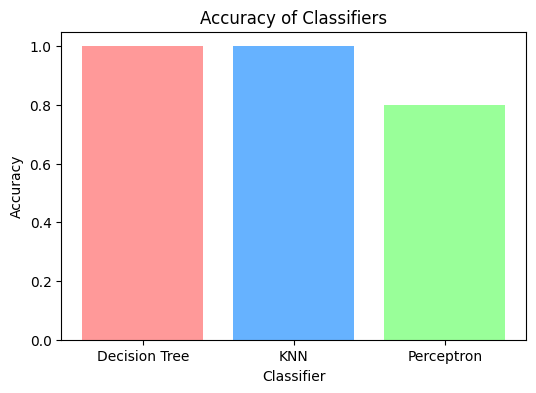

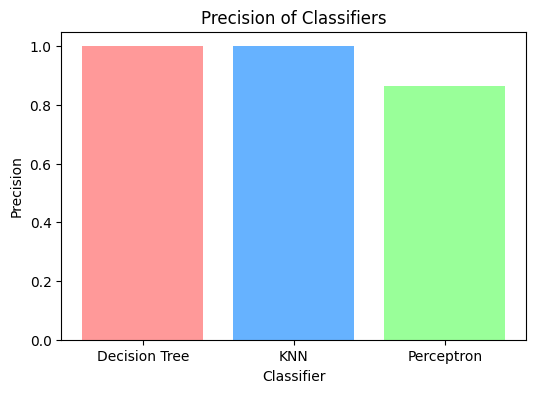

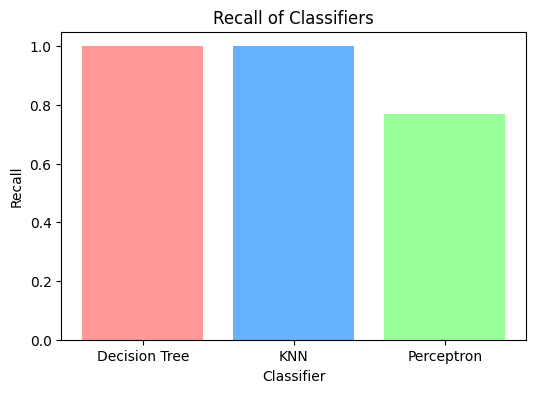

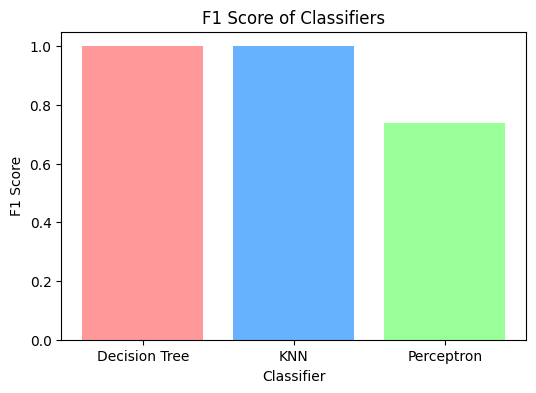

In [1]:
# Import necessary libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Visualization
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.linear_model import Perceptron  # Perceptron classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Evaluation metrics
from matplotlib.colors import ListedColormap  # Custom color maps

# Load the Iris dataset into a DataFrame
df = pd.read_csv('./Iris.csv')

# Extract features (X) and target labels (y) from the dataset
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()
y = pd.factorize(df['Species'])[0]  # Convert species labels into numerical format

# Split the data into training (70%) and testing (30%) sets with a fixed random state (INSTRUCTION #1: Split the dataset into training and testing sets.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a dictionary of classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='euclidean'),  # KNN with 5 neighbors and Euclidean distance
    'Perceptron': Perceptron()  # Perceptron for binary classification
}

# Train each classifier on the training data (INSTRUCTION #2: Train a decision tree, KNN, and perceptron classifier on the training set.)
for name, model in models.items():
    model.fit(X_train, y_train)

# Initialize a dictionary to store performance results
results = { 'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [] }

# Evaluate each classifier on the test data and collect metrics (INSTRUCTION #3: Evaluate each model using accuracy, precision, recall, and F1-score.)
for name, model in models.items():
    y_pred = model.predict(X_test)  # Make predictions on the test data
    results['Classifier'].append(name)  # Record classifier name
    results['Accuracy'].append(accuracy_score(y_test, y_pred))  # Record accuracy
    results['Precision'].append(precision_score(y_test, y_pred, average='macro'))  # Record precision (macro-average)
    results['Recall'].append(recall_score(y_test, y_pred, average='macro'))  # Record recall (macro-average)
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro'))  # Record F1 score (macro-average)

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)
print("Model Performance:")
print(results_df)  # Print the performance metrics for all classifiers

# Define custom color maps for plotting decision boundaries
background_cmap = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])  # Background colors
point_cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # Point colors

# Function to visualize decision boundaries for a given model (INSTRUCTION #4: Visualize the decision boundaries for all three classifiers.)
def plot_boundaries(X, y, model, axis, title):
    model.fit(X, y)  # Refit the model with the entire dataset
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Define min and max for the x-axis
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Define min and max for the y-axis
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  # Create a grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # Predict on the grid
    axis.contourf(xx, yy, Z, alpha=0.3, cmap=background_cmap)  # Plot filled contours
    axis.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=point_cmap)  # Plot data points
    axis.set_title(title)  # Set the plot title
    axis.set_xlabel('Sepal Length')  # Set the x-axis label
    axis.set_ylabel('Sepal Width')  # Set the y-axis label

# Prepare data for visualizing boundaries (using only sepal features)
X_vis = X[:, :2]

# Create subplots for decision boundaries of all three classifiers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot decision boundaries for each model
plot_boundaries(X_vis, y, models['Decision Tree'], axes[0], 'Decision Tree')
plot_boundaries(X_vis, y, models['KNN'], axes[1], 'KNN')
plot_boundaries(X_vis, y, models['Perceptron'], axes[2], 'Perceptron')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots
# Print the depth of the trained decision tree
tree_depth = models['Decision Tree'].get_depth()
print("The depth of the Decision Tree is:", tree_depth)

# Plotting performance metrics (Accuracy, Precision, Recall, and F1 Score) (INSTRUCTION #5: Plot the performance metrics for each classifier.)

# Define a list of colors for the bars in the plots
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Plot accuracy for each classifier
plt.figure(figsize=(6, 4))
plt.bar(results_df['Classifier'], results_df['Accuracy'], color=colors)
plt.xlabel('Classifier')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Accuracy of Classifiers')  # Plot title
plt.show()  # Display the plot

# Plot precision for each classifier
plt.figure(figsize=(6, 4))
plt.bar(results_df['Classifier'], results_df['Precision'], color=colors)
plt.xlabel('Classifier')  # X-axis label
plt.ylabel('Precision')  # Y-axis label
plt.title('Precision of Classifiers')  # Plot title
plt.show()  # Display the plot

# Plot recall for each classifier
plt.figure(figsize=(6, 4))
plt.bar(results_df['Classifier'], results_df['Recall'], color=colors)
plt.xlabel('Classifier')  # X-axis label
plt.ylabel('Recall')  # Y-axis label
plt.title('Recall of Classifiers')  # Plot title
plt.show()  # Display the plot

# Plot F1 score for each classifier
plt.figure(figsize=(6, 4))
plt.bar(results_df['Classifier'], results_df['F1 Score'], color=colors)
plt.xlabel('Classifier')  # X-axis label
plt.ylabel('F1 Score')  # Y-axis label
plt.title('F1 Score of Classifiers')  # Plot title
plt.show()  # Display the plot
